<a href="https://colab.research.google.com/github/MethEthPro/colab/blob/main/workshop/Pytorch_Day_3_CNN_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries
Install and import the PyTorch libraries we'll need.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [2]:
import torchvision
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

In [3]:
from torch.utils.data import DataLoader
## efficient in creating batches and in the process of iterationg through batches during training

## Data Exploration

Look at the classes of shape the model needs to identify.

In [4]:
train_data = datasets.FashionMNIST('.data', train = True, download = True)

100%|██████████| 26.4M/26.4M [00:01<00:00, 19.9MB/s]


Extracting .data/FashionMNIST/raw/train-images-idx3-ubyte.gz to .data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 318kB/s]


Extracting .data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to .data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.51MB/s]


Extracting .data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to .data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 13.6MB/s]


Extracting .data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to .data/FashionMNIST/raw



In [5]:
len(train_data)

60000

In [7]:
print("Shape:", train_data.data.shape)
print("Targets:",train_data.targets.shape, train_data.targets)
print("Classes: ", train_data.classes)
print("Class to idx:", train_data.class_to_idx)
#help(datasets.FashionMNIST)

Shape: torch.Size([60000, 28, 28])
Targets: torch.Size([60000]) tensor([9, 0, 0,  ..., 3, 0, 5])
Classes:  ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Class to idx: {'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


In [8]:
train_data[0][0]

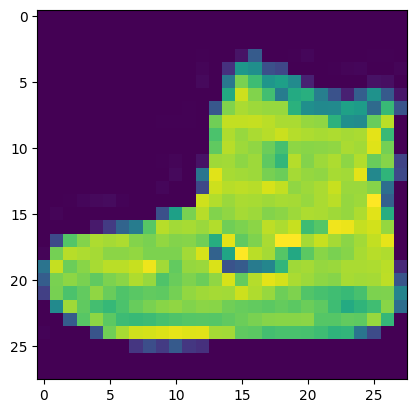

In [9]:
plt.imshow(train_data[0][0])

In [10]:
dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional_pil',
 '_functional_tensor',
 '_presets',
 'autoaugment',
 'functional',
 'transforms']

In [11]:
train_data.data.shape

torch.Size([60000, 28, 28])

## Transforms

1. To transform the image data into tensors,
> these are the core data structure used in PyTorch,
2. Normalize them so that the pixel values are in scale
> a mean of 0.5 and a standard deviation of 0.5

In [13]:
transform = transforms.ToTensor()

##pipeline = first run transform 1, then run transform 2, transform3


transform1 = transforms.Compose((transforms.ToTensor(), transforms.Normalize((0.5), (0.5))))

In [14]:
type(train_data.data[0])

torch.Tensor

In [15]:
train_data = datasets.FashionMNIST('.data', train = True, transform = transform1)

## ToTensor() -- converts images into tensor and then standardize your dataset (PIL)

PIL - python image library

In [12]:
train_data[0]

(<PIL.Image.Image image mode=L size=28x28>, 9)

## Load data

PyTorch includes functions for loading and transforming data.   
- We'll use these to create
1. an iterative loader for training data, and
2. a second iterative loader for test data




total dataset = 1000 images
[200] [200] [200] [200] [200]  shuffle = True
Index = 2
EPOCHS = iterate over ALL datapoints

In [16]:
train_iter = DataLoader(train_data, batch_size = 100, shuffle = True)

In [17]:
type(train_iter)

torch.utils.data.dataloader.DataLoader

In [18]:
for features, labels in train_iter:
  print(labels)
  break

tensor([4, 0, 3, 8, 2, 0, 7, 4, 6, 3, 7, 8, 6, 1, 1, 4, 9, 2, 7, 8, 8, 5, 4, 4,
        4, 4, 8, 1, 2, 1, 4, 3, 9, 2, 6, 8, 9, 7, 2, 8, 8, 7, 2, 7, 0, 2, 2, 1,
        0, 2, 0, 2, 0, 3, 2, 4, 1, 4, 1, 7, 0, 5, 5, 6, 2, 1, 9, 3, 5, 1, 2, 5,
        2, 1, 0, 2, 3, 5, 3, 4, 7, 3, 5, 6, 4, 3, 9, 2, 3, 6, 1, 8, 2, 1, 5, 0,
        9, 6, 5, 3])


In [ ]:
## nn.Linear()

In [19]:
iterator = iter(train_iter)

In [20]:
feat, lab = next(iterator)

In [23]:
feat.shape

torch.Size([100, 1, 28, 28])

In [21]:
x = feat[0]

In [22]:
x.shape

torch.Size([1, 28, 28])

### CNN using sequential operators
 > (crude way, no one does this)

Function definition
`torch.nn.Conv2d(in_channels, out_channels, kernel_size,...)`   
https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

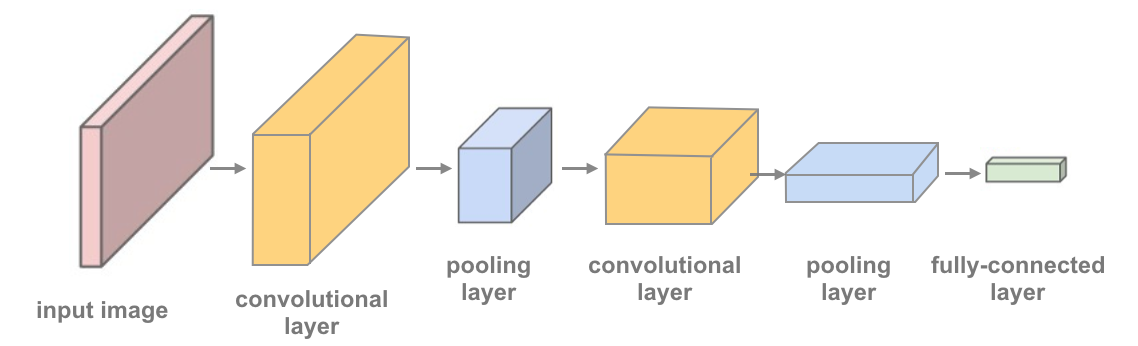

In [24]:
conv = nn.Conv2d(1, 6, 5)

In [25]:
conv.weight.shape     ## These are the weight parameter tensors

torch.Size([6, 1, 5, 5])

In [26]:
conv.bias.shape

torch.Size([6])

In [28]:
x

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000,  0.2078,  0.6471,  0.4902,  0.6471,  0.2235,
           0.0039,  0.6078,  0.5294,  0.6706,  0.4824, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000,  0.9451,  0.7725,  0.6941,  0.6863,  0.6706,
           0.4275,  0.7098,  0.7098,  0.7569,  0.9922, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000,  0.9843,  0.6941,  0.6627,  0.6863,  0.7412,
           0.6314,  0.6784,  0.6941,  0.6784,  0.9922, -0.4980, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -0.4745,  0.9922,  0.6549,  0

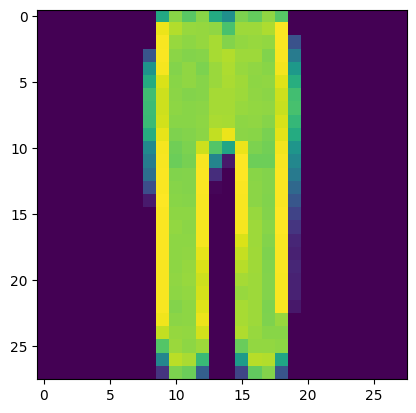

In [30]:
plt.imshow(x.squeeze())

In [32]:
x.shape

torch.Size([1, 28, 28])

In [27]:
x1 = conv(x)

In [31]:
x1.shape

torch.Size([6, 24, 24])

(N, C, H, W)

In [40]:
pooling = nn.MaxPool2d(2, 2)

In [41]:
x2 = pooling(x1)
x2.shape            ## Notice the change in Dimensions

torch.Size([6, 12, 12])

In [42]:
pooling = nn.MaxPool2d(3,3)
x3 = pooling(x1)
x3.shape
# notice the shape

torch.Size([6, 8, 8])

In [43]:
## simply coding each step in CNN sequentially (not a good practice)
x = feat[0]
x = nn.Conv2d(1, 6, 5)(x)
x = nn.MaxPool2d(2, 2)(x)
x = nn.Conv2d(6, 6, 5)(x)
x = nn.MaxPool2d(2, 2)(x)
x.shape

torch.Size([6, 4, 4])

In [44]:
F.relu(x)

tensor([[[0.5005, 0.0301, 0.2742, 0.2305],
         [0.5568, 0.1402, 0.2214, 0.1701],
         [0.6425, 0.1661, 0.2340, 0.2351],
         [0.6426, 0.1294, 0.2697, 0.2407]],

        [[0.0000, 0.0000, 0.0249, 0.2629],
         [0.0000, 0.0957, 0.0522, 0.2429],
         [0.0000, 0.0000, 0.0000, 0.2464],
         [0.0000, 0.0000, 0.0000, 0.2243]],

        [[0.3326, 0.0077, 0.3511, 0.0000],
         [0.2091, 0.2105, 0.1378, 0.0000],
         [0.2429, 0.1491, 0.1208, 0.0000],
         [0.2796, 0.2053, 0.1426, 0.0000]],

        [[0.1399, 0.0880, 0.2145, 0.2055],
         [0.0883, 0.3288, 0.0819, 0.1522],
         [0.2264, 0.3372, 0.0650, 0.1934],
         [0.1983, 0.3587, 0.0342, 0.1943]],

        [[0.4415, 0.3114, 0.3896, 0.0000],
         [0.5250, 0.3964, 0.4725, 0.0000],
         [0.5389, 0.2699, 0.4407, 0.0000],
         [0.5699, 0.2899, 0.3991, 0.0000]],

        [[0.6948, 0.2288, 0.0000, 0.0440],
         [0.6811, 0.4589, 0.0000, 0.0000],
         [0.5661, 0.5100, 0.0000, 0.0000],
 

## Define the CNN Model
In PyTorch, you define a neural network model as a class that is derived from the `nn.Module` base class.

You must  
- Define the layers in your network,
- Provide a forward method that is used to process data through the layers of the network.

visit this [site](https://poloclub.github.io/cnn-explainer/) for better understanding

In [45]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()

    self.fc3 = nn.Linear(20, 10)
    self.fc1 = nn.Linear(6*4*4, 80)
    self.fc2 = nn.Linear(80, 20)

    ## in_channels=1, out_channels=6, kernel_size=5
    self.conv1 = nn.Conv2d(1, 6, 5)

    ## apply max pooling with a kernel size of 2
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 6, 5)

    ## THESE ABOVE ARE THE COMPONENTS OF YOUR MODEL


  ## FWD PASS WILL DEFINE THE ARCHITECTURE OF YOUR MODEL
  def forward(self, x):   ## 1 x 28 x 28
    x = self.conv1(x)     ## 6 x 24 x 24
    x = F.relu(x)         ## 6 x 24 x 24
    x = self.pool(x)      ## 6 x 12 x 12
    x = self.conv2(x)      ## 6 x 8 x 8
    x = F.relu(x)         ## 6 x 8 x 8
    x = self.pool(x)      ## 6 x 4 x 4
    x = x.view(-1, 6*4*4) ## x.flatten() x.Flatten()
    x = self.fc1(x)   ## 1x80
    x = F.relu(x)     ## 1x80
    x = self.fc2(x)   ## 1x20
    x = F.relu(x)     ## 1x20
    x = self.fc3(x)   ## 1x10

    return x




In [46]:
Model = CNN()

In [47]:
x = feat[0]

In [48]:
out = Model(feat)
out.shape

torch.Size([100, 10])

## Training

- Define Loss
- Optimizer

Consists of an iterative series of forward passes where
- the training data is processed in batches,
- the optimizer adjusts the weights.

Forward pass \\
Backprop

Later, use a separate set of test images to test the model at the end of each iteration (or epoch) so we can track the performance improvement as the training process progresses.



## CrossEntropyLoss = Softmax + cross entropy loss

In [49]:
Loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(Model.parameters(), lr = 0.1, momentum= 0.9)

### 1 epoch = pass through entire dataset

### 1 iteration = pass through 1 batch


total points = 60000    
batch size = 100    
total batches = 600

f(x) = 1 if x = 0.0    
f(x) = 2 if x = 0.1   
f(x) = 300 if x = 0.2

In [50]:
for epoch in range(3):
  ## HERE EPOCH STARTS -- so refresh all your counters
  total_correct_pts = 0

  for features, labels in train_iter:   ## will run for 600 batches

    optimizer.zero_grad()   ## in order to remove any previous gradient info

    output = Model(features)  ## forward pass     100x10 max along dim=1

    ls = Loss(output, labels)   ## compute loss

    ls.backward()   ## back propagate the loss

    optimizer.step()  ## update the parameters

    corr = torch.argmax(output, axis = 1) == torch.as_tensor(labels)

    total_correct = torch.count_nonzero(corr)
    total_correct_pts += total_correct

  print("Accuracy: ", total_correct_pts/60000)





Accuracy:  tensor(0.7264)
Accuracy:  tensor(0.8324)
Accuracy:  tensor(0.8438)


In [51]:
output.shape

torch.Size([100, 10])

### Evaluate model performance on Test Data

In [52]:
test_data = datasets.FashionMNIST('.data', train = False, download = True, transform = transform1)

In [53]:
test_iter = DataLoader(test_data, shuffle = False, batch_size = 100)

In [54]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [55]:
# with torch.no_grad()

In [56]:
Model.eval()

## Model.train()

# test_output = Model()

CNN(
  (fc3): Linear(in_features=20, out_features=10, bias=True)
  (fc1): Linear(in_features=96, out_features=80, bias=True)
  (fc2): Linear(in_features=80, out_features=20, bias=True)
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 6, kernel_size=(5, 5), stride=(1, 1))
)

In [57]:
with torch.inference_mode():
  test_corr = 0
  for data in test_iter:
    feat, lab = data
    test_out = Model(feat)

    curr_classes = torch.argmax(test_out, axis = 1) == torch.as_tensor(lab)
    tcd = torch.count_nonzero(curr_classes)
    test_corr += tcd

  print(test_corr/10000)

tensor(0.8447)


## Many other Pre-defined Models

In [58]:
from torchvision import models

In [59]:
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

## Links
- https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
- https://pytorch.org/docs/stable/nn.html#maxpool2d